In [1]:
%matplotlib widget
import time
import random 
from tqdm import tqdm
import matplotlib.pyplot as pl
from source.environment import Environment
from source.agent import Agent

2023-07-18 17:30:26.546119: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
plotX = []
while True:
    agent = Agent() #currently agent is configured with only 2 actions
    env = Environment()
    env.startGame()    
    #3500 refers to the number of episodes/iterations of the game to play
    for i in tqdm(range(3500)): 
        state, reward, done = env.reset()
        epReward = 0
        done = False
        episodeTime = time.time()
        stepCounter = 0
        while not done:
            action = agent.act(state)
#             action = random.randint(0,1)
            nextState, reward, done = env.step(action)
            ########
            #This next section is storing more memory of later parts of the game since 
            #if you don't do this, most of the experience replay fills up with the 
            #starting parts of the game since its played more often. A more elegant 
            #approach to this is "Prioritized experience replay" but this is an effective
            #alternative too
            if stepCounter> 700:
                for _ in range(5):
                    agent.remember(state, nextState, action, reward, done, stepCounter)
            elif stepCounter> 40:
                agent.remember(state, nextState, action, reward, done, stepCounter)                
            if done == True: #game ended
                for _ in range(10):
                    agent.remember(state, nextState, action, reward, done, stepCounter)
                print("breaking")
                break
            #######
            state = nextState
            stepCounter += 1
            epReward += reward

        #post episode
        if stepCounter != 0:
            print("Avg Frame-Rate: ", 1/((time.time()-episodeTime)/stepCounter))
        plotX.append(epReward)
        print(epReward)
        agent.learn()


       
        if i % 20 == 0:
            agent.model.save_weights ("DinoGameSpeed4.h5")
            print( "Saved model to disk")

game starting in  2
game starting in  1
game starting in  0


  0%|                                                                                                                                                                                  | 0/3500 [00:00<?, ?it/s]

1/1 [==============================] - 0s 24ms/step


  0%|                                                                                                                                                                        | 1/3500 [00:05<5:24:01,  5.56s/it]

breaking
Avg Frame-Rate:  10.653857381289475
52
too little info
Saved model to disk
1/1 [==============================] - 0s 22ms/step


  0%|                                                                                                                                                                        | 2/3500 [00:06<2:42:46,  2.79s/it]

breaking
0
too little info
1/1 [==============================] - 0s 23ms/step


  0%|▏                                                                                                                                                                       | 3/3500 [00:25<9:53:58, 10.19s/it]

breaking
Avg Frame-Rate:  10.466229771215648
193
too little info
1/1 [==============================] - 0s 22ms/step


  0%|▏                                                                                                                                                                       | 4/3500 [00:26<6:18:16,  6.49s/it]

breaking
0
too little info
1/1 [==============================] - 0s 23ms/step


  0%|▏                                                                                                                                                                       | 5/3500 [00:31<5:56:09,  6.11s/it]

breaking
Avg Frame-Rate:  11.657791397329754
57
too little info
1/1 [==============================] - 0s 22ms/step


  0%|▎                                                                                                                                                                       | 6/3500 [00:32<4:11:14,  4.31s/it]

breaking
0
too little info
1/1 [==============================] - 0s 23ms/step


  0%|▎                                                                                                                                                                       | 7/3500 [00:52<9:11:49,  9.48s/it]

breaking
Avg Frame-Rate:  10.4829404725351
205
too little info
1/1 [==============================] - 0s 22ms/step


  0%|▍                                                                                                                                                                       | 8/3500 [00:53<6:31:10,  6.72s/it]

breaking
0
too little info
1/1 [==============================] - 0s 24ms/step


  0%|▍                                                                                                                                                                       | 9/3500 [00:59<6:23:09,  6.59s/it]

breaking
Avg Frame-Rate:  10.817229124335416
62
too little info
1/1 [==============================] - 0s 23ms/step


  0%|▍                                                                                                                                                                      | 10/3500 [01:00<4:39:40,  4.81s/it]

breaking
0
too little info
1/1 [==============================] - 0s 22ms/step
breaking
Avg Frame-Rate:  10.296851747221929
177
16/16 [==============================] - 1s 47ms/step


  0%|▌                                                                                                                                                                     | 11/3500 [02:14<25:12:16, 26.01s/it]

LOSS:  7.389816761016846
1/1 [==============================] - 0s 24ms/step
breaking
Avg Frame-Rate:  10.218269751852665
137
16/16 [==============================] - 1s 45ms/step


  0%|▌                                                                                                                                                                     | 12/3500 [03:09<33:41:34, 34.77s/it]

LOSS:  3.4980931282043457
1/1 [==============================] - 0s 27ms/step
breaking
Avg Frame-Rate:  10.01331337223623
69
16/16 [==============================] - 1s 50ms/step


  0%|▌                                                                                                                                                                     | 13/3500 [03:58<37:50:05, 39.06s/it]

LOSS:  2.3742876052856445
1/1 [==============================] - 0s 22ms/step
breaking
Avg Frame-Rate:  10.325564818891523
52
16/16 [==============================] - 1s 55ms/step


  0%|▋                                                                                                                                                                     | 14/3500 [04:55<43:12:11, 44.62s/it]

LOSS:  2.582123041152954
1/1 [==============================] - 0s 22ms/step
breaking
Avg Frame-Rate:  8.976883996889645
57
16/16 [==============================] - 1s 58ms/step


  0%|▋                                                                                                                                                                     | 15/3500 [05:59<48:45:35, 50.37s/it]

LOSS:  2.1841530799865723
1/1 [==============================] - 0s 22ms/step
breaking
Avg Frame-Rate:  10.075703631630724
60
16/16 [==============================] - 1s 45ms/step


  0%|▊                                                                                                                                                                     | 16/3500 [06:51<49:17:29, 50.93s/it]

LOSS:  2.159555196762085
1/1 [==============================] - 0s 22ms/step
breaking
Avg Frame-Rate:  8.92556533950043
107
16/16 [==============================] - 1s 44ms/step


  0%|▊                                                                                                                                                                     | 17/3500 [07:47<50:39:01, 52.35s/it]

LOSS:  1.7503868341445923
1/1 [==============================] - 0s 22ms/step
breaking
Avg Frame-Rate:  10.120692660087016
223
16/16 [==============================] - 1s 46ms/step


  1%|▊                                                                                                                                                                     | 18/3500 [09:02<57:20:30, 59.29s/it]

LOSS:  1.6333494186401367
1/1 [==============================] - 0s 23ms/step
breaking
Avg Frame-Rate:  10.261291679194697
50
16/16 [==============================] - 1s 46ms/step


  1%|▉                                                                                                                                                                     | 19/3500 [09:52<54:37:13, 56.49s/it]

LOSS:  2.325662851333618
1/1 [==============================] - 0s 23ms/step
breaking
Avg Frame-Rate:  9.765614233299903
256
16/16 [==============================] - 1s 44ms/step


  1%|▉                                                                                                                                                                     | 20/3500 [11:04<58:55:29, 60.96s/it]

LOSS:  3.5863521099090576
1/1 [==============================] - 0s 22ms/step
breaking
Avg Frame-Rate:  9.956215881168083
106
16/16 [==============================] - 1s 43ms/step


  1%|▉                                                                                                                                                                     | 21/3500 [11:59<57:23:25, 59.39s/it]

LOSS:  2.4787662029266357
Saved model to disk
1/1 [==============================] - 0s 22ms/step
breaking
Avg Frame-Rate:  7.843828375476202
39
16/16 [==============================] - 1s 42ms/step


  1%|█                                                                                                                                                                     | 22/3500 [12:50<54:48:55, 56.74s/it]

LOSS:  4.18228816986084
1/1 [==============================] - 0s 22ms/step
breaking
Avg Frame-Rate:  9.744923542312126
81
16/16 [==============================] - 1s 49ms/step


  1%|█                                                                                                                                                                     | 23/3500 [13:51<56:08:16, 58.12s/it]

LOSS:  2.9550795555114746
1/1 [==============================] - 0s 21ms/step
breaking
Avg Frame-Rate:  9.64234378090992
59
16/16 [==============================] - 1s 46ms/step


  1%|█▏                                                                                                                                                                    | 24/3500 [14:44<54:35:15, 56.54s/it]

LOSS:  3.1705753803253174
1/1 [==============================] - 0s 21ms/step
breaking
Avg Frame-Rate:  10.740276693715677
53
16/16 [==============================] - 1s 45ms/step


  1%|█▏                                                                                                                                                                    | 25/3500 [15:33<52:13:09, 54.10s/it]

LOSS:  2.7754924297332764
1/1 [==============================] - 0s 24ms/step
breaking
Avg Frame-Rate:  9.955484007636182
226
16/16 [==============================] - 1s 45ms/step


  1%|█▏                                                                                                                                                                    | 26/3500 [16:38<55:26:06, 57.45s/it]

LOSS:  4.447296619415283
1/1 [==============================] - 0s 24ms/step
breaking
Avg Frame-Rate:  10.197509307080157
62
16/16 [==============================] - 1s 51ms/step


  1%|█▎                                                                                                                                                                    | 27/3500 [17:39<56:37:27, 58.69s/it]

LOSS:  4.6048502922058105
1/1 [==============================] - 0s 22ms/step
breaking
Avg Frame-Rate:  9.689427244552904
54
16/16 [==============================] - 1s 46ms/step


  1%|█▎                                                                                                                                                                    | 28/3500 [18:27<53:30:21, 55.48s/it]

LOSS:  3.3875038623809814
1/1 [==============================] - 0s 23ms/step
breaking
Avg Frame-Rate:  9.823446180399804
174
16/16 [==============================] - 1s 44ms/step


  1%|█▍                                                                                                                                                                    | 29/3500 [19:28<54:51:08, 56.89s/it]

LOSS:  2.553297758102417
1/1 [==============================] - 0s 25ms/step
breaking
Avg Frame-Rate:  7.624014180640681
46
16/16 [==============================] - 1s 45ms/step


  1%|█▍                                                                                                                                                                    | 30/3500 [20:26<55:09:31, 57.23s/it]

LOSS:  4.566244125366211
1/1 [==============================] - 0s 24ms/step
breaking
Avg Frame-Rate:  9.792260385006903
242
16/16 [==============================] - 1s 43ms/step


  1%|█▍                                                                                                                                                                    | 31/3500 [21:36<58:53:16, 61.11s/it]

LOSS:  3.595055103302002
1/1 [==============================] - 0s 22ms/step
breaking
Avg Frame-Rate:  9.99304922916303
237
16/16 [==============================] - 1s 42ms/step


  1%|█▌                                                                                                                                                                    | 32/3500 [22:45<61:20:09, 63.67s/it]

LOSS:  3.280944347381592
1/1 [==============================] - 0s 23ms/step
breaking
Avg Frame-Rate:  10.061594837060676
135
16/16 [==============================] - 1s 44ms/step


  1%|█▌                                                                                                                                                                    | 33/3500 [23:56<63:22:39, 65.81s/it]

LOSS:  4.208822727203369
1/1 [==============================] - 0s 22ms/step
breaking
Avg Frame-Rate:  9.071208502506147
64
16/16 [==============================] - 1s 46ms/step


  1%|█▌                                                                                                                                                                    | 34/3500 [24:53<60:51:42, 63.21s/it]

LOSS:  2.891575336456299
1/1 [==============================] - 0s 22ms/step
breaking
Avg Frame-Rate:  7.948325181306101
64
16/16 [==============================] - 1s 45ms/step


  1%|█▋                                                                                                                                                                    | 35/3500 [25:47<58:08:04, 60.40s/it]

LOSS:  4.383025646209717
1/1 [==============================] - 0s 22ms/step
breaking
Avg Frame-Rate:  9.592498769123335
161
16/16 [==============================] - 1s 57ms/step


  1%|█▋                                                                                                                                                                    | 36/3500 [26:52<59:26:59, 61.78s/it]

LOSS:  3.4271111488342285
1/1 [==============================] - 0s 24ms/step
breaking
Avg Frame-Rate:  9.704068830680225
233
16/16 [==============================] - 1s 45ms/step


  1%|█▊                                                                                                                                                                    | 37/3500 [27:57<60:23:56, 62.79s/it]

LOSS:  4.073175430297852
1/1 [==============================] - 0s 22ms/step
breaking
Avg Frame-Rate:  9.774014246329331
204
16/16 [==============================] - 1s 44ms/step


  1%|█▊                                                                                                                                                                    | 38/3500 [29:03<61:05:43, 63.53s/it]

LOSS:  3.383065700531006
1/1 [==============================] - 0s 22ms/step
breaking
Avg Frame-Rate:  9.327421989096576
129
16/16 [==============================] - 1s 47ms/step


  1%|█▊                                                                                                                                                                    | 39/3500 [30:04<60:33:25, 62.99s/it]

LOSS:  2.8899147510528564
1/1 [==============================] - 0s 22ms/step
breaking
Avg Frame-Rate:  8.84542857593816
95
16/16 [==============================] - 1s 45ms/step


  1%|█▉                                                                                                                                                                    | 40/3500 [31:00<58:24:56, 60.78s/it]

LOSS:  3.7321290969848633
1/1 [==============================] - 0s 22ms/step
breaking
Avg Frame-Rate:  9.785002713742378
136
16/16 [==============================] - 1s 45ms/step


  1%|█▉                                                                                                                                                                    | 41/3500 [31:57<57:16:39, 59.61s/it]

LOSS:  4.206180572509766
Saved model to disk
1/1 [==============================] - 0s 23ms/step
breaking
Avg Frame-Rate:  9.930989914674146
308
16/16 [==============================] - 1s 48ms/step


  1%|█▉                                                                                                                                                                    | 42/3500 [33:18<63:35:03, 66.20s/it]

LOSS:  3.1410586833953857
1/1 [==============================] - 0s 22ms/step
breaking
Avg Frame-Rate:  9.614640297016832
174
16/16 [==============================] - 1s 44ms/step


  1%|██                                                                                                                                                                    | 43/3500 [34:21<62:29:14, 65.07s/it]

LOSS:  2.6707310676574707
1/1 [==============================] - 0s 23ms/step
breaking
Avg Frame-Rate:  9.781083761121241
63
16/16 [==============================] - 1s 43ms/step


  1%|██                                                                                                                                                                    | 44/3500 [35:16<59:34:40, 62.06s/it]

LOSS:  3.690241575241089
1/1 [==============================] - 0s 23ms/step
breaking
Avg Frame-Rate:  8.9154916993306
208
16/16 [==============================] - 1s 46ms/step


  1%|██▏                                                                                                                                                                   | 45/3500 [36:23<61:00:38, 63.57s/it]

LOSS:  3.096115827560425
1/1 [==============================] - 0s 23ms/step
breaking
Avg Frame-Rate:  9.616989166475243
196
16/16 [==============================] - 1s 44ms/step


  1%|██▏                                                                                                                                                                   | 46/3500 [37:35<63:20:48, 66.02s/it]

LOSS:  4.294355392456055
1/1 [==============================] - 0s 21ms/step
breaking
Avg Frame-Rate:  9.554657580254466
69
16/16 [==============================] - 1s 53ms/step


  1%|██▏                                                                                                                                                                   | 47/3500 [38:38<62:23:55, 65.06s/it]

LOSS:  2.314988613128662
1/1 [==============================] - 0s 29ms/step
breaking
Avg Frame-Rate:  9.509426274685524
179
16/16 [==============================] - 1s 45ms/step


  1%|██▎                                                                                                                                                                   | 48/3500 [39:39<61:17:46, 63.92s/it]

LOSS:  2.8116142749786377
1/1 [==============================] - 0s 23ms/step
breaking
Avg Frame-Rate:  8.71932780724857
138
16/16 [==============================] - 1s 46ms/step


  1%|██▎                                                                                                                                                                   | 49/3500 [40:41<60:40:05, 63.29s/it]

LOSS:  3.645235061645508
1/1 [==============================] - 0s 24ms/step
breaking
Avg Frame-Rate:  9.216772176299665
56
16/16 [==============================] - 1s 44ms/step


  1%|██▎                                                                                                                                                                   | 50/3500 [41:32<57:20:27, 59.83s/it]

LOSS:  5.34937047958374
1/1 [==============================] - 0s 23ms/step
breaking
Avg Frame-Rate:  9.413385207629233
169
16/16 [==============================] - 1s 45ms/step


  1%|██▍                                                                                                                                                                   | 51/3500 [42:33<57:41:13, 60.21s/it]

LOSS:  5.155205726623535
1/1 [==============================] - 0s 22ms/step
breaking
Avg Frame-Rate:  9.412662617934553
236
16/16 [==============================] - 1s 45ms/step


  1%|██▍                                                                                                                                                                   | 52/3500 [43:40<59:28:26, 62.10s/it]

LOSS:  2.481478691101074
1/1 [==============================] - 0s 22ms/step
breaking
Avg Frame-Rate:  9.71307572043121
48
16/16 [==============================] - 1s 44ms/step


  2%|██▌                                                                                                                                                                   | 53/3500 [44:26<54:50:07, 57.27s/it]

LOSS:  3.675827980041504
1/1 [==============================] - 0s 31ms/step
breaking
Avg Frame-Rate:  9.411622879305863
225
16/16 [==============================] - 1s 55ms/step


  2%|██▌                                                                                                                                                                   | 54/3500 [45:44<60:48:26, 63.52s/it]

LOSS:  2.848395347595215
1/1 [==============================] - 0s 24ms/step
breaking
Avg Frame-Rate:  8.759556725845929
214
16/16 [==============================] - 1s 45ms/step


  2%|██▌                                                                                                                                                                   | 55/3500 [46:52<62:07:57, 64.93s/it]

LOSS:  2.845975160598755
1/1 [==============================] - 0s 22ms/step
breaking
Avg Frame-Rate:  9.229069767253941
177
16/16 [==============================] - 1s 45ms/step


  2%|██▋                                                                                                                                                                   | 56/3500 [47:57<62:10:32, 64.99s/it]

LOSS:  4.835381984710693
1/1 [==============================] - 0s 21ms/step
breaking
Avg Frame-Rate:  9.420351521350913
46
16/16 [==============================] - 1s 45ms/step


  2%|██▋                                                                                                                                                                   | 57/3500 [48:46<57:33:54, 60.19s/it]

LOSS:  3.2355613708496094
1/1 [==============================] - 0s 23ms/step
breaking
Avg Frame-Rate:  9.026678616285848
177
16/16 [==============================] - 1s 43ms/step


  2%|██▊                                                                                                                                                                   | 58/3500 [49:51<58:55:57, 61.64s/it]

LOSS:  3.787827968597412
1/1 [==============================] - 0s 25ms/step
breaking
Avg Frame-Rate:  8.764563468407937
182
16/16 [==============================] - 1s 45ms/step


  2%|██▊                                                                                                                                                                   | 59/3500 [50:59<60:29:03, 63.28s/it]

LOSS:  3.7726783752441406
1/1 [==============================] - 0s 22ms/step
breaking
Avg Frame-Rate:  9.14264655210599
187
16/16 [==============================] - 1s 44ms/step


  2%|██▊                                                                                                                                                                   | 60/3500 [52:07<61:56:03, 64.82s/it]

LOSS:  2.667501449584961
1/1 [==============================] - 0s 22ms/step
breaking
Avg Frame-Rate:  9.899950536289591
48
16/16 [==============================] - 1s 45ms/step


  2%|██▉                                                                                                                                                                   | 61/3500 [53:03<59:32:31, 62.33s/it]

LOSS:  3.5015597343444824
Saved model to disk
1/1 [==============================] - 0s 22ms/step
breaking
Avg Frame-Rate:  9.087261978086792
87
16/16 [==============================] - 1s 43ms/step


  2%|██▉                                                                                                                                                                   | 62/3500 [54:07<59:59:43, 62.82s/it]

LOSS:  2.2358174324035645
1/1 [==============================] - 0s 24ms/step
breaking
Avg Frame-Rate:  9.182556223221388
246
16/16 [==============================] - 1s 55ms/step


  2%|██▉                                                                                                                                                                   | 63/3500 [55:31<65:47:08, 68.91s/it]

LOSS:  4.17719841003418
1/1 [==============================] - 0s 25ms/step
breaking
Avg Frame-Rate:  8.592579621725733
160
16/16 [==============================] - 1s 47ms/step


  2%|███                                                                                                                                                                   | 64/3500 [56:32<63:39:55, 66.70s/it]

LOSS:  5.294755935668945
1/1 [==============================] - 0s 23ms/step
breaking
Avg Frame-Rate:  9.092949433737678
220
16/16 [==============================] - 1s 47ms/step


  2%|███                                                                                                                                                                   | 65/3500 [57:40<64:04:06, 67.15s/it]

LOSS:  5.316806316375732
1/1 [==============================] - 0s 24ms/step
breaking
Avg Frame-Rate:  9.04677366422468
413
16/16 [==============================] - 1s 44ms/step


  2%|███▏                                                                                                                                                                  | 66/3500 [59:21<73:34:39, 77.13s/it]

LOSS:  3.5759215354919434
1/1 [==============================] - 0s 23ms/step
breaking
Avg Frame-Rate:  9.538011770156253
84
16/16 [==============================] - 1s 44ms/step


  2%|███▏                                                                                                                                                                | 67/3500 [1:00:20<68:21:10, 71.68s/it]

LOSS:  3.782210111618042
1/1 [==============================] - 0s 23ms/step
breaking
Avg Frame-Rate:  7.418417091497945
46
16/16 [==============================] - 1s 46ms/step


  2%|███▏                                                                                                                                                                | 68/3500 [1:01:12<62:43:29, 65.80s/it]

LOSS:  2.6525022983551025
1/1 [==============================] - 0s 23ms/step
breaking
Avg Frame-Rate:  9.248086638486619
120
16/16 [==============================] - 1s 46ms/step


  2%|███▏                                                                                                                                                                | 69/3500 [1:02:08<60:03:27, 63.02s/it]

LOSS:  3.213513135910034
1/1 [==============================] - 0s 22ms/step
breaking
Avg Frame-Rate:  9.630338818681402
190
16/16 [==============================] - 1s 44ms/step


  2%|███▎                                                                                                                                                                | 70/3500 [1:03:22<62:58:03, 66.09s/it]

LOSS:  4.853072643280029
1/1 [==============================] - 0s 23ms/step
breaking
Avg Frame-Rate:  9.5603045239386
247
16/16 [==============================] - 1s 44ms/step


  2%|███▎                                                                                                                                                                | 71/3500 [1:04:38<65:47:48, 69.08s/it]

LOSS:  5.050616264343262
1/1 [==============================] - 0s 23ms/step
breaking
Avg Frame-Rate:  9.563959479645996
196
16/16 [==============================] - 1s 47ms/step


  2%|███▎                                                                                                                                                                | 72/3500 [1:05:45<65:10:45, 68.45s/it]

LOSS:  5.515401840209961
1/1 [==============================] - 0s 22ms/step
breaking
Avg Frame-Rate:  8.355132629429932
110
16/16 [==============================] - 1s 44ms/step


  2%|███▍                                                                                                                                                                | 73/3500 [1:06:53<65:08:42, 68.43s/it]

LOSS:  4.556114196777344
1/1 [==============================] - 0s 21ms/step
breaking
Avg Frame-Rate:  9.307694747397692
243
16/16 [==============================] - 1s 46ms/step


  2%|███▍                                                                                                                                                                | 74/3500 [1:08:05<66:01:07, 69.37s/it]

LOSS:  3.672032117843628
1/1 [==============================] - 0s 22ms/step
breaking
Avg Frame-Rate:  9.222152819312624
189
16/16 [==============================] - 1s 45ms/step


  2%|███▌                                                                                                                                                                | 75/3500 [1:09:11<65:05:57, 68.43s/it]

LOSS:  5.635730743408203
1/1 [==============================] - 0s 21ms/step
breaking
Avg Frame-Rate:  9.46423180657038
198
16/16 [==============================] - 1s 45ms/step


  2%|███▌                                                                                                                                                                | 76/3500 [1:10:22<65:50:29, 69.23s/it]

LOSS:  4.812056064605713
1/1 [==============================] - 0s 22ms/step
breaking
Avg Frame-Rate:  7.325450968532771
46
16/16 [==============================] - 1s 46ms/step


  2%|███▌                                                                                                                                                                | 77/3500 [1:11:15<61:12:23, 64.37s/it]

LOSS:  4.659494400024414
1/1 [==============================] - 0s 21ms/step
breaking
Avg Frame-Rate:  9.139528259091026
99
16/16 [==============================] - 1s 44ms/step


  2%|███▋                                                                                                                                                                | 78/3500 [1:12:21<61:34:45, 64.78s/it]

LOSS:  3.1802854537963867
1/1 [==============================] - 0s 21ms/step
breaking
Avg Frame-Rate:  9.633624849918837
81
16/16 [==============================] - 1s 46ms/step


  2%|███▋                                                                                                                                                                | 79/3500 [1:13:12<57:44:27, 60.76s/it]

LOSS:  3.7566847801208496
1/1 [==============================] - 0s 22ms/step
breaking
Avg Frame-Rate:  9.697878176988628
62
16/16 [==============================] - 1s 44ms/step


  2%|███▋                                                                                                                                                                | 80/3500 [1:14:06<55:40:32, 58.61s/it]

LOSS:  4.326658248901367
1/1 [==============================] - 0s 24ms/step
breaking
Avg Frame-Rate:  9.19867052219616
64
16/16 [==============================] - 1s 44ms/step


  2%|███▊                                                                                                                                                                | 81/3500 [1:15:07<56:31:24, 59.52s/it]

LOSS:  3.224350690841675
Saved model to disk
1/1 [==============================] - 0s 22ms/step
breaking
Avg Frame-Rate:  9.399388463960749
233
16/16 [==============================] - 1s 44ms/step


  2%|███▊                                                                                                                                                                | 82/3500 [1:16:15<58:55:06, 62.06s/it]

LOSS:  4.696005821228027
1/1 [==============================] - 0s 24ms/step
breaking
Avg Frame-Rate:  8.73761291548487
202
16/16 [==============================] - 1s 45ms/step


  2%|███▉                                                                                                                                                                | 83/3500 [1:17:22<60:08:45, 63.37s/it]

LOSS:  3.805868148803711
1/1 [==============================] - 0s 23ms/step
breaking
Avg Frame-Rate:  9.308939030084789
94
16/16 [==============================] - 1s 45ms/step


  2%|███▉                                                                                                                                                                | 84/3500 [1:18:15<57:16:14, 60.36s/it]

LOSS:  4.228422164916992
1/1 [==============================] - 0s 23ms/step
breaking
Avg Frame-Rate:  9.047463077830589
326
16/16 [==============================] - 1s 51ms/step


  2%|███▉                                                                                                                                                                | 85/3500 [1:19:41<64:29:50, 67.99s/it]

LOSS:  3.8554885387420654
1/1 [==============================] - 0s 22ms/step
breaking
Avg Frame-Rate:  9.232011435521615
209
16/16 [==============================] - 1s 55ms/step


  2%|████                                                                                                                                                                | 86/3500 [1:20:58<67:12:04, 70.86s/it]

LOSS:  4.71569299697876
1/1 [==============================] - 0s 23ms/step
breaking
Avg Frame-Rate:  9.167546611249756
114
16/16 [==============================] - 1s 46ms/step


  2%|████                                                                                                                                                                | 87/3500 [1:21:58<63:53:46, 67.40s/it]

LOSS:  2.8432042598724365
1/1 [==============================] - 0s 22ms/step
breaking
Avg Frame-Rate:  8.727094662458903
280
16/16 [==============================] - 1s 46ms/step


  3%|████                                                                                                                                                                | 88/3500 [1:23:25<69:24:24, 73.23s/it]

LOSS:  4.443050384521484
1/1 [==============================] - 0s 21ms/step
breaking
Avg Frame-Rate:  9.232166364188531
194
16/16 [==============================] - 1s 55ms/step


  3%|████▏                                                                                                                                                               | 89/3500 [1:24:42<70:40:06, 74.58s/it]

LOSS:  3.5078775882720947
1/1 [==============================] - 0s 23ms/step
breaking
Avg Frame-Rate:  9.15119158958666
240
16/16 [==============================] - 1s 46ms/step


  3%|████▏                                                                                                                                                               | 90/3500 [1:25:56<70:16:47, 74.20s/it]

LOSS:  2.547457695007324
1/1 [==============================] - 0s 22ms/step
breaking
Avg Frame-Rate:  9.505068204046474
67
16/16 [==============================] - 1s 45ms/step


  3%|████▎                                                                                                                                                               | 91/3500 [1:26:47<63:42:19, 67.27s/it]

LOSS:  3.867215156555176
1/1 [==============================] - 0s 22ms/step
breaking
Avg Frame-Rate:  8.456823266858546
254
16/16 [==============================] - 1s 45ms/step


  3%|████▎                                                                                                                                                               | 92/3500 [1:28:12<68:44:51, 72.62s/it]

LOSS:  3.7561538219451904
1/1 [==============================] - 0s 22ms/step
breaking
Avg Frame-Rate:  8.940715246589985
90
16/16 [==============================] - 1s 46ms/step


  3%|████▎                                                                                                                                                               | 93/3500 [1:29:05<63:10:46, 66.76s/it]

LOSS:  3.8689663410186768
1/1 [==============================] - 0s 22ms/step
breaking
Avg Frame-Rate:  9.59802863171716
47
16/16 [==============================] - 1s 45ms/step


  3%|████▍                                                                                                                                                               | 94/3500 [1:29:53<57:58:39, 61.28s/it]

LOSS:  3.7391977310180664
1/1 [==============================] - 0s 21ms/step
breaking
Avg Frame-Rate:  8.815554205923851
176
16/16 [==============================] - 1s 46ms/step


  3%|████▍                                                                                                                                                               | 95/3500 [1:30:57<58:41:28, 62.05s/it]

LOSS:  3.9464175701141357
1/1 [==============================] - 0s 23ms/step
breaking
Avg Frame-Rate:  9.083543225478001
160
16/16 [==============================] - 1s 43ms/step


  3%|████▍                                                                                                                                                               | 96/3500 [1:32:10<61:48:50, 65.37s/it]

LOSS:  3.873599052429199
1/1 [==============================] - 0s 22ms/step
breaking
Avg Frame-Rate:  7.397475027917658
43
16/16 [==============================] - 1s 44ms/step


  3%|████▌                                                                                                                                                               | 97/3500 [1:33:04<58:23:09, 61.77s/it]

LOSS:  2.2768890857696533
1/1 [==============================] - 0s 26ms/step
breaking
Avg Frame-Rate:  8.821077429011735
184
16/16 [==============================] - 1s 45ms/step


  3%|████▌                                                                                                                                                               | 98/3500 [1:34:08<58:57:27, 62.39s/it]

LOSS:  5.960841178894043
1/1 [==============================] - 0s 23ms/step
breaking
Avg Frame-Rate:  8.802343145000819
304
16/16 [==============================] - 1s 46ms/step


  3%|████▋                                                                                                                                                               | 99/3500 [1:35:37<66:39:14, 70.55s/it]

LOSS:  3.680926561355591
1/1 [==============================] - 0s 23ms/step
breaking
Avg Frame-Rate:  9.129946276777329
82
16/16 [==============================] - 1s 44ms/step


  3%|████▋                                                                                                                                                              | 100/3500 [1:36:32<62:08:51, 65.80s/it]

LOSS:  4.0544819831848145
1/1 [==============================] - 0s 23ms/step
breaking
Avg Frame-Rate:  8.41620998650719
201
16/16 [==============================] - 1s 47ms/step


  3%|████▋                                                                                                                                                              | 101/3500 [1:37:45<64:06:20, 67.90s/it]

LOSS:  4.206455230712891
Saved model to disk
1/1 [==============================] - 0s 22ms/step
breaking
Avg Frame-Rate:  8.757245043997429
269
16/16 [==============================] - 1s 55ms/step


  3%|████▊                                                                                                                                                              | 102/3500 [1:39:15<70:30:06, 74.69s/it]

LOSS:  4.976587295532227
1/1 [==============================] - 0s 24ms/step
breaking
Avg Frame-Rate:  8.61071792324025
51
16/16 [==============================] - 1s 53ms/step


  3%|████▊                                                                                                                                                              | 103/3500 [1:40:09<64:29:15, 68.34s/it]

LOSS:  4.679078578948975
1/1 [==============================] - 0s 23ms/step
breaking
Avg Frame-Rate:  8.641957228410677
161
16/16 [==============================] - 1s 46ms/step


  3%|████▊                                                                                                                                                              | 104/3500 [1:41:13<63:15:27, 67.06s/it]

LOSS:  4.203239440917969
1/1 [==============================] - 0s 23ms/step
breaking
Avg Frame-Rate:  8.521940577893607
280
16/16 [==============================] - 1s 47ms/step


  3%|████▉                                                                                                                                                              | 105/3500 [1:42:29<65:55:41, 69.91s/it]

LOSS:  5.476998329162598
1/1 [==============================] - 0s 23ms/step
breaking
Avg Frame-Rate:  8.428534887722387
101
16/16 [==============================] - 1s 45ms/step


  3%|████▉                                                                                                                                                              | 106/3500 [1:43:28<62:41:35, 66.50s/it]

LOSS:  3.914297342300415
1/1 [==============================] - 0s 22ms/step
breaking
Avg Frame-Rate:  8.972897673273495
60
16/16 [==============================] - 1s 46ms/step


  3%|████▉                                                                                                                                                              | 107/3500 [1:44:18<57:59:10, 61.52s/it]

LOSS:  5.638139247894287
1/1 [==============================] - 0s 25ms/step
breaking
Avg Frame-Rate:  8.664680577728333
94
16/16 [==============================] - 1s 46ms/step


  3%|█████                                                                                                                                                              | 108/3500 [1:45:12<55:57:15, 59.39s/it]

LOSS:  3.5118956565856934
1/1 [==============================] - 0s 22ms/step
breaking
Avg Frame-Rate:  9.142699478342484
45
16/16 [==============================] - 1s 59ms/step


  3%|█████                                                                                                                                                              | 109/3500 [1:46:13<56:16:37, 59.75s/it]

LOSS:  5.175658226013184
1/1 [==============================] - 0s 24ms/step
breaking
Avg Frame-Rate:  8.822408271587129
79
16/16 [==============================] - 1s 46ms/step


  3%|█████                                                                                                                                                              | 110/3500 [1:47:06<54:19:47, 57.70s/it]

LOSS:  6.143141269683838
1/1 [==============================] - 0s 21ms/step
breaking
Avg Frame-Rate:  8.468726221558939
104
16/16 [==============================] - 1s 50ms/step


  3%|█████▏                                                                                                                                                             | 111/3500 [1:48:05<54:53:06, 58.30s/it]

LOSS:  4.713130474090576
1/1 [==============================] - 0s 24ms/step
breaking
Avg Frame-Rate:  8.82623151875265
270
16/16 [==============================] - 1s 53ms/step


  3%|█████▏                                                                                                                                                             | 112/3500 [1:49:45<66:39:41, 70.83s/it]

LOSS:  4.683599948883057
1/1 [==============================] - 0s 23ms/step
breaking
Avg Frame-Rate:  8.791102638980087
283
16/16 [==============================] - 1s 46ms/step


  3%|█████▎                                                                                                                                                             | 113/3500 [1:51:13<71:14:45, 75.73s/it]

LOSS:  5.105606555938721
1/1 [==============================] - 0s 23ms/step
breaking
Avg Frame-Rate:  8.531704670678323
187
16/16 [==============================] - 1s 46ms/step


  3%|█████▎                                                                                                                                                             | 114/3500 [1:52:18<68:16:53, 72.60s/it]

LOSS:  5.658263683319092
1/1 [==============================] - 0s 23ms/step
breaking
Avg Frame-Rate:  8.668920513616174
73
16/16 [==============================] - 1s 45ms/step


  3%|█████▎                                                                                                                                                             | 115/3500 [1:53:21<65:33:13, 69.72s/it]

LOSS:  5.292940139770508
1/1 [==============================] - 0s 23ms/step
breaking
Avg Frame-Rate:  8.909659784232264
97
16/16 [==============================] - 1s 45ms/step


  3%|█████▍                                                                                                                                                             | 116/3500 [1:54:15<61:14:55, 65.16s/it]

LOSS:  4.078866481781006
1/1 [==============================] - 0s 29ms/step
breaking
Avg Frame-Rate:  7.881791126829414
130
16/16 [==============================] - 1s 47ms/step


  3%|█████▍                                                                                                                                                             | 117/3500 [1:55:19<60:39:54, 64.56s/it]

LOSS:  4.444100379943848
1/1 [==============================] - 0s 24ms/step
breaking
Avg Frame-Rate:  8.31054575855396
97
16/16 [==============================] - 1s 45ms/step


  3%|█████▍                                                                                                                                                             | 118/3500 [1:56:23<60:34:39, 64.48s/it]

LOSS:  6.157177448272705
1/1 [==============================] - 0s 24ms/step
breaking
Avg Frame-Rate:  7.872104514404142
228
16/16 [==============================] - 1s 47ms/step


  3%|█████▌                                                                                                                                                             | 119/3500 [1:57:52<67:38:32, 72.02s/it]

LOSS:  6.08450174331665
1/1 [==============================] - 0s 21ms/step
breaking
Avg Frame-Rate:  9.473210419790453
380
16/16 [==============================] - 1s 45ms/step


  3%|█████▌                                                                                                                                                             | 120/3500 [1:59:18<71:31:24, 76.18s/it]

LOSS:  4.8780646324157715
1/1 [==============================] - 0s 25ms/step
breaking
Avg Frame-Rate:  7.693549520678766
57
16/16 [==============================] - 1s 45ms/step


  3%|█████▋                                                                                                                                                             | 121/3500 [2:00:13<65:34:36, 69.87s/it]

LOSS:  5.164852619171143
Saved model to disk
1/1 [==============================] - 0s 23ms/step
breaking
Avg Frame-Rate:  9.007359966824989
189
16/16 [==============================] - 1s 45ms/step


  3%|█████▋                                                                                                                                                             | 122/3500 [2:01:23<65:19:18, 69.61s/it]

LOSS:  6.92361307144165
1/1 [==============================] - 0s 22ms/step
breaking
Avg Frame-Rate:  9.225018643629664
215
16/16 [==============================] - 1s 45ms/step


  4%|█████▋                                                                                                                                                             | 123/3500 [2:02:29<64:31:44, 68.79s/it]

LOSS:  5.354982852935791
1/1 [==============================] - 0s 22ms/step
breaking
Avg Frame-Rate:  9.405969164980963
238
16/16 [==============================] - 1s 47ms/step


  4%|█████▊                                                                                                                                                             | 124/3500 [2:03:42<65:38:10, 69.99s/it]

LOSS:  4.661617279052734
1/1 [==============================] - 0s 24ms/step
breaking
Avg Frame-Rate:  8.659901669069425
130
16/16 [==============================] - 1s 45ms/step


  4%|█████▊                                                                                                                                                             | 125/3500 [2:04:45<63:34:37, 67.82s/it]

LOSS:  4.215371608734131
1/1 [==============================] - 0s 23ms/step
breaking
Avg Frame-Rate:  9.315994597623595
55
16/16 [==============================] - 1s 45ms/step


  4%|█████▊                                                                                                                                                             | 126/3500 [2:05:37<59:13:47, 63.20s/it]

LOSS:  4.514450550079346
1/1 [==============================] - 0s 21ms/step
breaking
Avg Frame-Rate:  9.230156775488968
144
16/16 [==============================] - 1s 45ms/step


  4%|█████▉                                                                                                                                                             | 127/3500 [2:06:41<59:21:18, 63.35s/it]

LOSS:  4.819791316986084
1/1 [==============================] - 0s 23ms/step
breaking
Avg Frame-Rate:  9.094414750197172
162
16/16 [==============================] - 1s 45ms/step


  4%|█████▉                                                                                                                                                             | 128/3500 [2:07:44<59:13:48, 63.24s/it]

LOSS:  3.6473941802978516
1/1 [==============================] - 0s 22ms/step
breaking
Avg Frame-Rate:  9.208057396514157
198
16/16 [==============================] - 1s 56ms/step


  4%|██████                                                                                                                                                             | 129/3500 [2:08:55<61:21:01, 65.52s/it]

LOSS:  3.4196677207946777
1/1 [==============================] - 0s 24ms/step
breaking
Avg Frame-Rate:  8.989675183976848
188
16/16 [==============================] - 1s 46ms/step


  4%|██████                                                                                                                                                             | 130/3500 [2:09:59<60:59:05, 65.15s/it]

LOSS:  7.189071178436279
1/1 [==============================] - 0s 25ms/step
breaking
Avg Frame-Rate:  6.60077819361542
38
16/16 [==============================] - 1s 45ms/step


  4%|██████                                                                                                                                                             | 131/3500 [2:10:56<58:34:59, 62.60s/it]

LOSS:  4.121243476867676
1/1 [==============================] - 0s 23ms/step
breaking
Avg Frame-Rate:  8.936888999951504
50
16/16 [==============================] - 1s 46ms/step


  4%|██████▏                                                                                                                                                            | 132/3500 [2:11:46<55:06:53, 58.91s/it]

LOSS:  8.567899703979492
1/1 [==============================] - 0s 23ms/step
breaking
Avg Frame-Rate:  9.075102279526861
260
16/16 [==============================] - 1s 45ms/step


  4%|██████▏                                                                                                                                                            | 133/3500 [2:13:04<60:17:26, 64.46s/it]

LOSS:  4.3523850440979
1/1 [==============================] - 0s 26ms/step
breaking
Avg Frame-Rate:  9.213890312319638
82
16/16 [==============================] - 1s 46ms/step


  4%|██████▏                                                                                                                                                            | 134/3500 [2:13:59<57:51:05, 61.87s/it]

LOSS:  3.281782388687134
1/1 [==============================] - 0s 22ms/step
breaking
Avg Frame-Rate:  9.088646883370354
205
16/16 [==============================] - 1s 46ms/step


  4%|██████▎                                                                                                                                                            | 135/3500 [2:15:15<61:39:17, 65.96s/it]

LOSS:  4.213551998138428
1/1 [==============================] - 0s 24ms/step
breaking
Avg Frame-Rate:  8.15810400858042
126
16/16 [==============================] - 1s 45ms/step


  4%|██████▎                                                                                                                                                            | 136/3500 [2:16:17<60:30:46, 64.76s/it]

LOSS:  4.495389938354492
1/1 [==============================] - 0s 24ms/step
breaking
Avg Frame-Rate:  8.943882190266477
81
16/16 [==============================] - 1s 46ms/step


  4%|██████▍                                                                                                                                                            | 137/3500 [2:17:14<58:28:04, 62.59s/it]

LOSS:  3.3742411136627197
1/1 [==============================] - 0s 23ms/step
breaking
Avg Frame-Rate:  8.821132354228281
190
16/16 [==============================] - 1s 45ms/step


  4%|██████▍                                                                                                                                                            | 138/3500 [2:18:24<60:26:46, 64.73s/it]

LOSS:  5.25814151763916
1/1 [==============================] - 0s 23ms/step
breaking
Avg Frame-Rate:  8.935609304216293
262
16/16 [==============================] - 1s 45ms/step


  4%|██████▍                                                                                                                                                            | 139/3500 [2:19:37<62:45:40, 67.22s/it]

LOSS:  6.013662338256836
1/1 [==============================] - 0s 24ms/step
breaking
Avg Frame-Rate:  9.212319814667726
127
16/16 [==============================] - 1s 46ms/step


  4%|██████▌                                                                                                                                                            | 140/3500 [2:20:37<60:48:04, 65.14s/it]

LOSS:  5.967577934265137
1/1 [==============================] - 0s 25ms/step
breaking
Avg Frame-Rate:  9.170184960200134
70
16/16 [==============================] - 1s 44ms/step


  4%|██████▌                                                                                                                                                            | 141/3500 [2:21:28<56:42:59, 60.79s/it]

LOSS:  4.982038974761963
Saved model to disk
1/1 [==============================] - 0s 24ms/step
breaking
Avg Frame-Rate:  8.498902552927808
283
16/16 [==============================] - 1s 44ms/step


  4%|██████▌                                                                                                                                                            | 142/3500 [2:22:43<60:47:15, 65.17s/it]

LOSS:  3.2278807163238525
1/1 [==============================] - 0s 23ms/step
breaking
Avg Frame-Rate:  8.972416867077502
174
16/16 [==============================] - 1s 46ms/step


  4%|██████▋                                                                                                                                                            | 143/3500 [2:23:48<60:35:48, 64.98s/it]

LOSS:  4.405939102172852
1/1 [==============================] - 0s 22ms/step
breaking
Avg Frame-Rate:  8.495499017145095
131
16/16 [==============================] - 1s 47ms/step


  4%|██████▋                                                                                                                                                            | 144/3500 [2:24:46<58:33:23, 62.81s/it]

LOSS:  5.7358856201171875
1/1 [==============================] - 0s 25ms/step
breaking
Avg Frame-Rate:  8.998145002811588
115
16/16 [==============================] - 1s 45ms/step


  4%|██████▊                                                                                                                                                            | 145/3500 [2:25:52<59:32:06, 63.88s/it]

LOSS:  3.8332598209381104
1/1 [==============================] - 0s 23ms/step
breaking
Avg Frame-Rate:  7.769135872713101
99
16/16 [==============================] - 1s 46ms/step


  4%|██████▊                                                                                                                                                            | 146/3500 [2:26:52<58:18:53, 62.59s/it]

LOSS:  4.545755386352539
1/1 [==============================] - 0s 23ms/step
breaking
Avg Frame-Rate:  8.597436346252568
183
16/16 [==============================] - 1s 45ms/step


  4%|██████▊                                                                                                                                                            | 147/3500 [2:27:58<59:16:15, 63.64s/it]

LOSS:  4.993845462799072
1/1 [==============================] - 0s 22ms/step
breaking
Avg Frame-Rate:  9.20367112527417
125
16/16 [==============================] - 1s 60ms/step


  4%|██████▉                                                                                                                                                            | 148/3500 [2:29:12<62:21:34, 66.97s/it]

LOSS:  5.77756404876709
1/1 [==============================] - 0s 22ms/step
breaking
Avg Frame-Rate:  9.027710641853348
145
16/16 [==============================] - 1s 46ms/step


  4%|██████▉                                                                                                                                                            | 149/3500 [2:30:16<61:22:32, 65.94s/it]

LOSS:  4.718991279602051
1/1 [==============================] - 0s 22ms/step
breaking
Avg Frame-Rate:  9.16575372048007
89
16/16 [==============================] - 1s 59ms/step


  4%|██████▉                                                                                                                                                            | 150/3500 [2:31:18<60:22:11, 64.88s/it]

LOSS:  4.478914260864258
1/1 [==============================] - 0s 23ms/step
breaking
Avg Frame-Rate:  9.46342417410046
56
16/16 [==============================] - 1s 47ms/step


  4%|███████                                                                                                                                                            | 151/3500 [2:32:12<57:18:52, 61.61s/it]

LOSS:  3.932569742202759
1/1 [==============================] - 0s 22ms/step
breaking
Avg Frame-Rate:  8.07878610408682
144
16/16 [==============================] - 1s 45ms/step


  4%|███████                                                                                                                                                            | 152/3500 [2:33:16<57:59:14, 62.35s/it]

LOSS:  3.4173054695129395
1/1 [==============================] - 0s 24ms/step
breaking
Avg Frame-Rate:  8.742274896124272
81
16/16 [==============================] - 1s 55ms/step


  4%|███████▏                                                                                                                                                           | 153/3500 [2:34:17<57:31:16, 61.87s/it]

LOSS:  4.4419941902160645
1/1 [==============================] - 0s 23ms/step
breaking
Avg Frame-Rate:  9.268366059362968
78
16/16 [==============================] - 1s 46ms/step


  4%|███████▏                                                                                                                                                           | 154/3500 [2:35:10<54:55:27, 59.09s/it]

LOSS:  4.69521427154541
1/1 [==============================] - 0s 22ms/step
breaking
Avg Frame-Rate:  8.888946332291486
146
16/16 [==============================] - 1s 44ms/step


  4%|███████▏                                                                                                                                                           | 155/3500 [2:36:14<56:20:55, 60.64s/it]

LOSS:  4.931656837463379
1/1 [==============================] - 0s 23ms/step
breaking
Avg Frame-Rate:  8.74312176046507
127
16/16 [==============================] - 1s 44ms/step


  4%|███████▎                                                                                                                                                           | 156/3500 [2:37:21<57:57:40, 62.40s/it]

LOSS:  4.395581245422363
1/1 [==============================] - 0s 22ms/step
breaking
Avg Frame-Rate:  8.878109419945051
123
16/16 [==============================] - 1s 46ms/step


  4%|███████▎                                                                                                                                                           | 157/3500 [2:38:21<57:23:17, 61.80s/it]

LOSS:  3.2643909454345703
1/1 [==============================] - 0s 23ms/step
breaking
Avg Frame-Rate:  8.878661326046378
83
16/16 [==============================] - 1s 46ms/step


  5%|███████▎                                                                                                                                                           | 158/3500 [2:39:23<57:20:03, 61.76s/it]

LOSS:  3.910667657852173
1/1 [==============================] - 0s 22ms/step
breaking
Avg Frame-Rate:  8.991117902907451
56
16/16 [==============================] - 1s 44ms/step


  5%|███████▍                                                                                                                                                           | 159/3500 [2:40:15<54:37:14, 58.86s/it]

LOSS:  3.640392541885376
1/1 [==============================] - 0s 22ms/step
breaking
Avg Frame-Rate:  5.611890351098094
28
16/16 [==============================] - 1s 44ms/step


  5%|███████▍                                                                                                                                                           | 160/3500 [2:41:04<51:48:25, 55.84s/it]

LOSS:  4.780878067016602
1/1 [==============================] - 0s 23ms/step
breaking
Avg Frame-Rate:  8.634143206234235
54
16/16 [==============================] - 1s 53ms/step


  5%|███████▍                                                                                                                                                           | 161/3500 [2:42:06<53:46:07, 57.97s/it]

LOSS:  4.843040466308594
Saved model to disk
1/1 [==============================] - 0s 22ms/step
breaking
Avg Frame-Rate:  8.761936882663022
254
16/16 [==============================] - 1s 44ms/step


  5%|███████▌                                                                                                                                                           | 162/3500 [2:43:29<60:40:04, 65.43s/it]

LOSS:  5.200921058654785
1/1 [==============================] - 0s 22ms/step
breaking
Avg Frame-Rate:  8.599884646478406
194
16/16 [==============================] - 1s 55ms/step


  5%|███████▌                                                                                                                                                           | 163/3500 [2:44:41<62:25:53, 67.35s/it]

LOSS:  5.132673740386963
1/1 [==============================] - 0s 24ms/step
breaking
Avg Frame-Rate:  8.195867873364268
250
16/16 [==============================] - 1s 46ms/step


  5%|███████▋                                                                                                                                                           | 164/3500 [2:45:56<64:32:55, 69.66s/it]

LOSS:  6.1643500328063965
1/1 [==============================] - 0s 22ms/step
breaking
Avg Frame-Rate:  8.54428345359463
86
16/16 [==============================] - 1s 44ms/step


  5%|███████▋                                                                                                                                                           | 165/3500 [2:46:51<60:18:33, 65.10s/it]

LOSS:  4.959481239318848
1/1 [==============================] - 0s 22ms/step
breaking
Avg Frame-Rate:  8.80441191775865
112
16/16 [==============================] - 1s 48ms/step


  5%|███████▋                                                                                                                                                           | 166/3500 [2:47:48<58:01:13, 62.65s/it]

LOSS:  4.958407402038574
1/1 [==============================] - 0s 24ms/step
breaking
Avg Frame-Rate:  8.431753081341958
127
16/16 [==============================] - 1s 47ms/step


  5%|███████▊                                                                                                                                                           | 167/3500 [2:48:47<56:59:11, 61.55s/it]

LOSS:  3.3709070682525635
1/1 [==============================] - 0s 22ms/step
breaking
Avg Frame-Rate:  8.759784721563511
91
16/16 [==============================] - 1s 45ms/step


  5%|███████▊                                                                                                                                                           | 168/3500 [2:49:44<55:44:56, 60.23s/it]

LOSS:  4.841865539550781
1/1 [==============================] - 0s 24ms/step
breaking
Avg Frame-Rate:  8.721385771747231
263
16/16 [==============================] - 1s 45ms/step


  5%|███████▊                                                                                                                                                           | 169/3500 [2:51:06<61:57:24, 66.96s/it]

LOSS:  6.575481414794922
1/1 [==============================] - 0s 23ms/step
breaking
Avg Frame-Rate:  7.6569143947914196
81
16/16 [==============================] - 1s 46ms/step


  5%|███████▉                                                                                                                                                           | 170/3500 [2:52:05<59:34:33, 64.41s/it]

LOSS:  3.3404183387756348
1/1 [==============================] - 0s 23ms/step
breaking
Avg Frame-Rate:  8.620837428133349
79
16/16 [==============================] - 1s 46ms/step


  5%|███████▉                                                                                                                                                           | 171/3500 [2:53:05<58:24:28, 63.16s/it]

LOSS:  3.9818084239959717
1/1 [==============================] - 0s 25ms/step
breaking
Avg Frame-Rate:  8.661405382140382
170
16/16 [==============================] - 1s 46ms/step


  5%|████████                                                                                                                                                           | 172/3500 [2:54:10<58:44:08, 63.54s/it]

LOSS:  5.486695289611816
1/1 [==============================] - 0s 21ms/step
breaking
Avg Frame-Rate:  9.549551900967554
47
16/16 [==============================] - 1s 44ms/step


  5%|████████                                                                                                                                                           | 173/3500 [2:55:03<55:52:36, 60.46s/it]

LOSS:  6.227748870849609
1/1 [==============================] - 0s 22ms/step
breaking
Avg Frame-Rate:  8.709315269855319
260
16/16 [==============================] - 1s 44ms/step


  5%|████████                                                                                                                                                           | 174/3500 [2:56:18<59:59:17, 64.93s/it]

LOSS:  6.906531810760498
1/1 [==============================] - 0s 23ms/step
breaking
Avg Frame-Rate:  8.878137647204314
85
16/16 [==============================] - 1s 45ms/step


  5%|████████▏                                                                                                                                                          | 175/3500 [2:57:20<58:58:46, 63.86s/it]

LOSS:  4.539145469665527
1/1 [==============================] - 0s 22ms/step
breaking
Avg Frame-Rate:  7.789588778709049
100
16/16 [==============================] - 1s 47ms/step


  5%|████████▏                                                                                                                                                          | 176/3500 [2:58:24<59:01:45, 63.93s/it]

LOSS:  4.1173882484436035
1/1 [==============================] - 0s 21ms/step
breaking
Avg Frame-Rate:  8.351342697962794
197
16/16 [==============================] - 1s 54ms/step


  5%|████████▏                                                                                                                                                          | 177/3500 [2:59:46<64:02:29, 69.38s/it]

LOSS:  5.774890899658203
1/1 [==============================] - 0s 22ms/step
breaking
Avg Frame-Rate:  8.703869971340861
241
16/16 [==============================] - 1s 46ms/step


  5%|████████▎                                                                                                                                                          | 178/3500 [3:00:57<64:30:33, 69.91s/it]

LOSS:  8.096247673034668
1/1 [==============================] - 0s 23ms/step
breaking
Avg Frame-Rate:  8.331301924544809
138
16/16 [==============================] - 1s 55ms/step


  5%|████████▎                                                                                                                                                          | 179/3500 [3:02:01<62:54:00, 68.18s/it]

LOSS:  6.428357124328613
1/1 [==============================] - 0s 23ms/step
breaking
Avg Frame-Rate:  8.45525525437344
173
16/16 [==============================] - 1s 52ms/step


  5%|████████▍                                                                                                                                                          | 180/3500 [3:03:24<66:52:27, 72.51s/it]

LOSS:  6.294534683227539
1/1 [==============================] - 0s 24ms/step
breaking
Avg Frame-Rate:  8.483688943838064
60
16/16 [==============================] - 1s 45ms/step


  5%|████████▍                                                                                                                                                          | 181/3500 [3:04:17<61:38:36, 66.86s/it]

LOSS:  6.483283996582031
Saved model to disk
1/1 [==============================] - 0s 23ms/step
breaking
Avg Frame-Rate:  8.654782076668226
67
16/16 [==============================] - 1s 47ms/step


  5%|████████▍                                                                                                                                                          | 182/3500 [3:05:08<57:01:07, 61.86s/it]

LOSS:  4.422759532928467
1/1 [==============================] - 0s 32ms/step
breaking
Avg Frame-Rate:  8.576010031368755
73
16/16 [==============================] - 1s 51ms/step


  5%|████████▌                                                                                                                                                          | 183/3500 [3:06:03<55:13:54, 59.94s/it]

LOSS:  4.65540885925293
1/1 [==============================] - 0s 22ms/step
breaking
Avg Frame-Rate:  8.369979500318639
147
16/16 [==============================] - 1s 56ms/step


  5%|████████▌                                                                                                                                                          | 184/3500 [3:07:16<58:57:45, 64.01s/it]

LOSS:  7.172600746154785
1/1 [==============================] - 0s 38ms/step
breaking
Avg Frame-Rate:  9.047592882103471
55
16/16 [==============================] - 1s 45ms/step


  5%|████████▌                                                                                                                                                          | 185/3500 [3:08:16<57:37:28, 62.58s/it]

LOSS:  4.052191257476807
1/1 [==============================] - 0s 25ms/step
breaking
Avg Frame-Rate:  8.596697564490555
123
16/16 [==============================] - 1s 56ms/step


  5%|████████▋                                                                                                                                                          | 186/3500 [3:09:23<58:51:16, 63.93s/it]

LOSS:  5.562905311584473
1/1 [==============================] - 0s 22ms/step
breaking
Avg Frame-Rate:  8.842027763518319
61
16/16 [==============================] - 1s 44ms/step


  5%|████████▋                                                                                                                                                          | 187/3500 [3:10:15<55:40:09, 60.49s/it]

LOSS:  4.706924915313721
1/1 [==============================] - 0s 21ms/step
breaking
Avg Frame-Rate:  8.36632907193716
69
16/16 [==============================] - 1s 46ms/step


  5%|████████▊                                                                                                                                                          | 188/3500 [3:11:07<53:13:03, 57.85s/it]

LOSS:  6.236095905303955
1/1 [==============================] - 0s 22ms/step
breaking
Avg Frame-Rate:  7.425876840154891
73
16/16 [==============================] - 1s 45ms/step


  5%|████████▊                                                                                                                                                          | 189/3500 [3:12:02<52:27:42, 57.04s/it]

LOSS:  6.335999011993408
1/1 [==============================] - 0s 23ms/step
breaking
Avg Frame-Rate:  8.31737226874191
211
16/16 [==============================] - 1s 45ms/step


  5%|████████▊                                                                                                                                                          | 190/3500 [3:13:11<55:41:20, 60.57s/it]

LOSS:  5.063694953918457
1/1 [==============================] - 0s 21ms/step
breaking
Avg Frame-Rate:  9.004665387538862
59
16/16 [==============================] - 1s 55ms/step


  5%|████████▉                                                                                                                                                          | 191/3500 [3:14:04<53:38:53, 58.37s/it]

LOSS:  5.155209064483643
1/1 [==============================] - 0s 23ms/step
breaking
Avg Frame-Rate:  8.603334025497581
150
16/16 [==============================] - 1s 45ms/step


  5%|████████▉                                                                                                                                                          | 192/3500 [3:15:18<57:47:54, 62.90s/it]

LOSS:  5.456923484802246
1/1 [==============================] - 0s 22ms/step
breaking
Avg Frame-Rate:  8.626389864147201
183
16/16 [==============================] - 1s 48ms/step


  6%|████████▉                                                                                                                                                          | 193/3500 [3:16:30<60:27:32, 65.82s/it]

LOSS:  4.500833034515381
1/1 [==============================] - 0s 23ms/step
breaking
Avg Frame-Rate:  8.815927521655485
49
16/16 [==============================] - 1s 46ms/step


  6%|█████████                                                                                                                                                          | 194/3500 [3:17:25<57:18:07, 62.40s/it]

LOSS:  4.678647994995117
1/1 [==============================] - 0s 23ms/step
breaking
Avg Frame-Rate:  7.629328805058856
100
16/16 [==============================] - 1s 47ms/step


  6%|█████████                                                                                                                                                          | 194/3500 [3:18:21<56:20:11, 61.35s/it]

KeyboardInterrupt



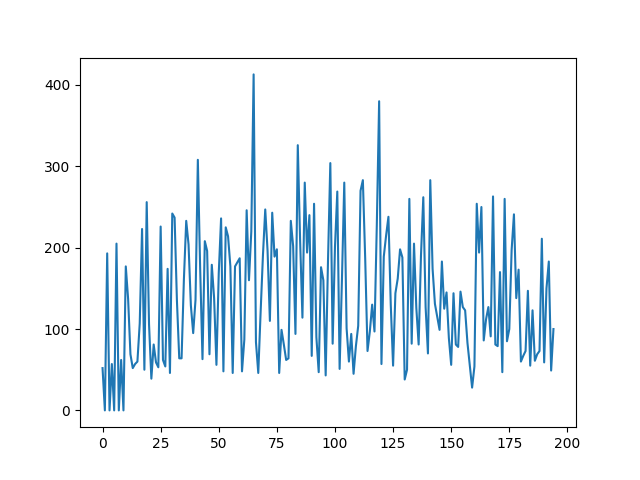

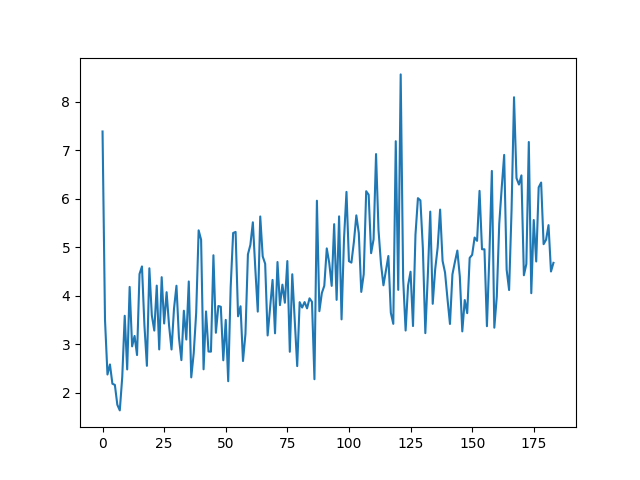

In [3]:
fig1, ax1 = pl.subplots()
ax1.plot(range(len(plotX)),plotX) 

fig2, ax2 = pl.subplots()
ax2.plot(range(len(agent.loss)), agent.loss) 